In [2]:
import numpy as np

In [15]:
from Angrybird import AngryBird
from tqdm.notebook import tqdm
env = AngryBird()
#np.load("cs.npy")
seconds = np.arange(11)
pos = np.zeros((11, 2))
pos[:, 0] = seconds * 10
pos[:, 1] = seconds * 20 - 2 * seconds**2

nul=np.zeros(2)
costs = 0.
m = 10000
for z in tqdm(range(m)):
    state = env.reset()
    for _ in range(10):
        force = nul#main(state, coeffs)
        state, _, _, _ = env.step(force)
        #print(state[1:], pos[int(state[0])])
        costs += np.linalg.norm(state[1:] - pos[int(state[0])]) ** 2
        state[1:] = pos[int(state[0])]
    _, cost, _, _ = env.step(nul)
    costs += cost
    #costs += env.cost.sum()
print(costs/m)


176.16821532635691


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

#%matplotlib notebook

[-7.19764437e-07]


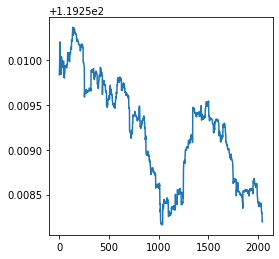

In [91]:
all_rewards = np.load("rewards.npy")#[-1000:]
x_data, y_data = list(range(len(all_rewards))), all_rewards  

reg.fit(np.array(x_data).reshape(-1, 1), y_data)
print(reg.coef_)

figure = plt.figure(figsize=(4, 4))
line, = plt.plot(x_data, y_data)

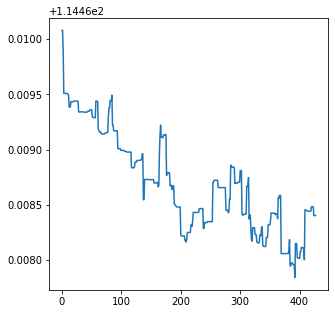

In [13]:
from matplotlib import pyplot
from matplotlib.animation import FuncAnimation

all_rewards = np.load("rewards.npy")
x_data, y_data = list(range(len(all_rewards))), all_rewards  

figure = plt.figure(figsize=(5, 5))
line, = plt.plot(x_data, y_data)

def update(frame):
    all_rewards = np.load("rewards.npy")
    x_data, y_data = list(range(len(all_rewards))), all_rewards    
    line.set_data(x_data, y_data)
    figure.gca().relim()
    figure.gca().autoscale_view()
    return line,

animation = FuncAnimation(figure, update, interval=200)

plt.show()